## **BBM 444 - Programming Assignment 2: HDR Imaging and Tonemapping**

* You can add as many cells as you want in-between each question, define any function and variable as needed. However, your code needs to be well-commented.  
* Please add Markdown cells to answer the (non-coding) questions in the homework text.
* Please be careful about the order of runs of cells. Doing the homework, it is likely that you will be running the cells in different orders, however, they will be evaluated in the order they appear. Hence, please try running the cells in this order before submission to make sure they work.    
* Please refer to the homework text for any implementation detail. Though you are somewhat expected to abide by the comments in the below cells, they are mainly just provided for guidance and by no means are they complete and/or descriptive enough. Accordingly, as long as you are not completely off this structure and your work pattern is understandable and traceable, it is fine. For instance, you do not have to implement a particular function within a cell just because the comment directs you to do so. 
* **Required packages and functions:** numpy, skimage, matplotlib, and cv2 (OpenCV, to read and write HDR files), and you should use the functions provided in the ./ src/cp_assng2.py file of the assignment ZIP archive.
* Working with the provided and captured exposure stacks, you will notice that your algorithms will be using a lot of memory. That's why you should be careful about how many of these images you create in your Python code, as otherwise you run the risk of filling up your memory. Further, you need to make sure you use vectorized code that processes all of its pixels in parallel, as trying to process all 25 million pixels one-by-one with a double for loop will take ages.
* To be able to display HDR images, multiply your image with an appropriate scaling factor of your own (smaller than 1 if the image is very bright, larger than 1 otherwise), apply gamma encoding, and then use the clip and imshow functions as in Programming Assignment 1. You will likely need to experiment with a few different values for the scaling factor you apply, until you find the one that correctly exposes your image. Otherwise, it may appear very bright or very dark.
* There will be a lot of reusing the same functionality, hence implementing the algorithms you are asked with functions (and making appropriate calls when necessary, rather than just code blocks ) is likely to be beneficial.
* You can use the function readHDR in the code we provide to open
and load the .HDR in Python, as otherwise to open HDR images, you'll need a dedicated viewer.
* **This document is also your report. Show your work. Please articulate your arguments well and support them using relevant figures and images.**



### *Insert personal info here*

### 1. HDR Imaging (60 points)

You are provided with both RAW (with .NEF extensions) and rendered (with .JPG extensions) images in the data folder, both of which are to be used to create HDR images.

#### 1.1. Develop RAW images (5 points)

To convert RAW .NEF images into linear 16-bit .TIFF images, use dcraw and specify the camera's profile for white balancing, high-quality interpolation for demosaicing, and sRGB as the output color space. The correct set of flags for this conversion can be found in dcraw's documentation. Report them in the below cell.

##### ***REPORT dcraw flags here. Double tap to write in this cell.***


"-v": "Verbose mode - prints detailed processing information",

"-w": "Use camera white balance (as seen in output 'multipliers 1.058594 1.000000 2.500000 1.000000')",

"-4": "Write 16-bit linear output (for linear TIFF requirement)",

"-t 0": "High-quality interpolation for demosaicing (uses AHD - Adaptive 
Homogeneity-Directed interpolation)",

"-T": "Write TIFF output instead of PPM",

"-j": "Use camera color profile and convert to sRGB colorspace (as seen in 'Converting to sRGB colorspace')"


## OUTPUT

Loading NIKON D2X image from data/Lab Booth/_MDF0019.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0019.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0020.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0020.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0021.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0021.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0022.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0022.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0023.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0023.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0024.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0024.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0025.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0025.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0026.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0026.tiff ...


Loading NIKON D2X image from data/Lab Booth/_MDF0027.NEF ...
Scaling with darkness 0, saturation 4095, and
multipliers 1.058594 1.000000 2.500000 1.000000
AHD interpolation...
Converting to sRGB colorspace...
Writing data to data/Lab Booth/_MDF0027.tiff ...


#### 1. 2. Weighting Schemes

You are expected to implement 4 different weighting schemes, namely, uniform, tent, Gaussian, and photon. (All hold the assumption that the intensity values z $\in$ [0,1]).

\\begin{eqnarray}
w_{\text{uniform}} & = & \left\{
        \begin{array}{ll}
            1, & \;\, \text{if}\;\, Z_{\text{min}}\leq z \leq Z_{\text{max}}, \\
            0, & \;\, \text{otherwise}
        \end{array},
    \right.\\\nonumber
w_{\text{tent}} & = & \left\{
        \begin{array}{ll}
            \text{min}(z,1-z), & \;\, \text{if}\;\, Z_{\text{min}}\leq z \leq Z_{\text{max}}, \\
            0, & \;\, \text{otherwise}
        \end{array},
    \right. \\\nonumber
w_{\text{Gaussian}} & = & \left\{
        \begin{array}{ll}
            \text{exp}\left(-4\frac{(z-0.5)^2}{0.5^2}\right), & \;\, \text{if}\;\, Z_{\text{min}}\leq z \leq Z_{\text{max}}, \\
            0, & \;\, \text{otherwise}
        \end{array},
    \right. \\\nonumber
w_{\text{photon}} & = & \left\{
        \begin{array}{ll}
            t^k, & \;\, \text{if}\;\, Z_{\text{min}}\leq z \leq Z_{\text{max}}, \\
            0, & \;\, \text{otherwise}
        \end{array},
    \right.
\end{eqnarray} 

Though the recommended values for $Z_{\text{max}}$ and $Z_{\text{min}}$ are 0.05 and 0.95 respectively, you can experiment with different clipping values. 


 

In [1]:
import os


In [2]:
os.chdir("assignments/assignment2-cmp")

In [3]:
## Implement (possibly) functions or a class for these weighting schemes
from weighting_schemes import WeightingSchemes




#### 1.3. Linearize rendered images (25 points)

Rendered images, being non-linear, need to be linearized before merging into HDR images. For this, we'll use the method by Debevec and Malik [1]. Please refer to the homework text and the paper for any implementation detail.

$I^k_{ij}: $ intensity of pixel (i, j) of the $k^{th}$ image and $I^k_{ij} = f(t^kL_{ij}) $, where $I^k_{ij} \in \{ 0, ..., 255 \}$ and $t^k$ the exposure time of image k. f is the non-linearity introduced by the camera's ISP. That is, calculating its inverse, $f^{-1}$, one can get the linear response.

Instead of $f^{-1}$, recover the function $g =\text{log}(f^{-1})$ that maps the pixel values $I^k_{ij}$ to $g(I^k_{ij})=\text{log}(L_{ij})+\text{log}(t^k)$. **Notice domain of g is discrete** an takes on values in the range $\{ 0, ..., 255 \}$. Hence, the second derivative of g can be approximated via a Laplacian filter.

Assuming static scene upon capturing, $L_{ij}$ is constant across all LDR images. That is, to recover g, the least-squares optimization problem in the hw text needs to be solved. 

*Hint: Solve problem by expressing it in matrix form: $||Av -b ||^2$, where A is a matrix and $\mathbf{v} = [g; \text{log} (L_{ij} )]$ are the unknowns. Use one of NumPy’s solvers to recover the unknowns. (See numpy function numpy.linalg.lstsq)* 

Though, Debevec and Malik [1] recovers a g for each color channel, recovering a single g for all channels suffices for this homework.

Plot the function g you recovered and use it to convert non-linear images into linear.

**Solving the linear equation, unless downsampled, processing the whole image will cause memory error, ie, you will run out of memory. That's why you need to downsample the image I with I[::N, ::N], for some N . We recommend using N = 200. In general it is advisable to use downscaled images during the debugging process of your code to speed up the development process. After ensuring the correctness of the code, the final results can be obtained by running it on the full-resolution image.**


In [4]:
## Implement a solver (perhaps a function) for the optimization problem and recovering g
from response_calibration import ResponseCalibration

#### 1.4. Merge exposure stack into HDR image (30 points)
Given a set of k LDR linear images corresponding to different exposures $t^k$, we can merge them into an HDR image either in the linear or in the logarithmic domain, where the motivation for the former is physical accuracy, whereas, that for the latter is human visual perception.

Please see the homework text for both algorithms. 

**Merging multiple LDR images, some pixels may not have well-exposed values, which makes the sum of weights in the equations' denominators zero. For over-exposed pixels, assign the maximum valid pixel value, and for under-exposed pixels, assign the minimum valid pixel value.**

In [5]:
from hdr_merging import HDRMerger


#### 1.4. Experiment

You have 2 sets of images (RAW and rendered), 2 merging schemes (linear and logarithmic), and 4 weighting schemes (uniform, tent, Gaussian, and photon-noise optimal), which, in total, makes 16 different HDR images. Additionally, you will need to tune the regularizer hyperparameter $\lambda$.  

Select one out of the sixteen HDR images you created. You can select, for
example, the one that you find the most aesthetically pleasing. Make sure to comment on why you selected the image. Note that, as you have not yet tonemapped your HDR images, if you display them directly they will not look very nice; see “Hints and Information”.

In [6]:
from hdr_experiments import *

In [7]:
try:
    # Import required modules
    import os
    import traceback
    from hdr_experiments import run_experiments, visualize_results
    
    print("Starting experiments...")
    
    # Run the experiments (path handling is already done in hdr_experiments.py)
    results = run_experiments()
    
    # Visualize the results
    print("\nGenerating visualizations...")
    visualize_results(results)
    
    print("\nExperiments completed successfully!")

except Exception as e:
    print(f"\nAn error occurred: {str(e)}")
    print("\nDetailed error information:")
    print(traceback.format_exc())

Starting experiments...

Processing JPG images...
Loading 9 jpg images...
Loading _MDF0019.jpg
Loading _MDF0020.jpg
Loading _MDF0021.jpg
Loading _MDF0022.jpg
Loading _MDF0023.jpg
Loading _MDF0024.jpg
Loading _MDF0025.jpg
Loading _MDF0026.jpg
Loading _MDF0027.jpg
Calibrating camera response function...
Linearizing images...
Creating HDR image with linear merging and uniform weighting...
Creating HDR image with linear merging and tent weighting...
Creating HDR image with linear merging and gaussian weighting...


/notebooks/assignments/assignment2-cmp/hdr_experiments.py:102: RuntimeWarning: invalid value encountered in divide
  normalized = (log_img - np.min(log_img)) / (np.max(log_img) - np.min(log_img))
/usr/local/lib/python3.11/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


Creating HDR image with linear merging and photon weighting...
Creating HDR image with logarithmic merging and uniform weighting...
Creating HDR image with logarithmic merging and tent weighting...
Creating HDR image with logarithmic merging and gaussian weighting...
Creating HDR image with logarithmic merging and photon weighting...

Processing TIFF images...
Loading 9 tiff images...
Loading _MDF0019.tiff
Loading _MDF0020.tiff
Loading _MDF0021.tiff
Loading _MDF0022.tiff
Loading _MDF0023.tiff
Loading _MDF0024.tiff
Loading _MDF0025.tiff
Loading _MDF0026.tiff
Loading _MDF0027.tiff
Creating HDR image with linear merging and uniform weighting...
Creating HDR image with linear merging and tent weighting...
Creating HDR image with linear merging and gaussian weighting...
Creating HDR image with linear merging and photon weighting...
Creating HDR image with logarithmic merging and uniform weighting...
Creating HDR image with logarithmic merging and tent weighting...
Creating HDR image with lo


Processing JPG images...
Loading 9 jpg images...
Loading _MDF0019.jpg
Loading _MDF0020.jpg
Loading _MDF0021.jpg
Loading _MDF0022.jpg
Loading _MDF0023.jpg
Loading _MDF0024.jpg
Loading _MDF0025.jpg
Loading _MDF0026.jpg
Loading _MDF0027.jpg
Calibrating camera response function...
Linearizing images...
Creating HDR image with linear merging and uniform weighting...
Creating HDR image with linear merging and tent weighting...
Creating HDR image with linear merging and gaussian weighting...
Creating HDR image with linear merging and photon weighting...
Creating HDR image with logarithmic merging and uniform weighting...
Creating HDR image with logarithmic merging and tent weighting...
Creating HDR image with logarithmic merging and gaussian weighting...
Creating HDR image with logarithmic merging and photon weighting...

Processing TIFF images...
Loading 9 tiff images...
Loading _MDF0019.tiff
Loading _MDF0020.tiff
Loading _MDF0021.tiff
Loading _MDF0022.tiff
Loading _MDF0023.tiff
Loading _MD

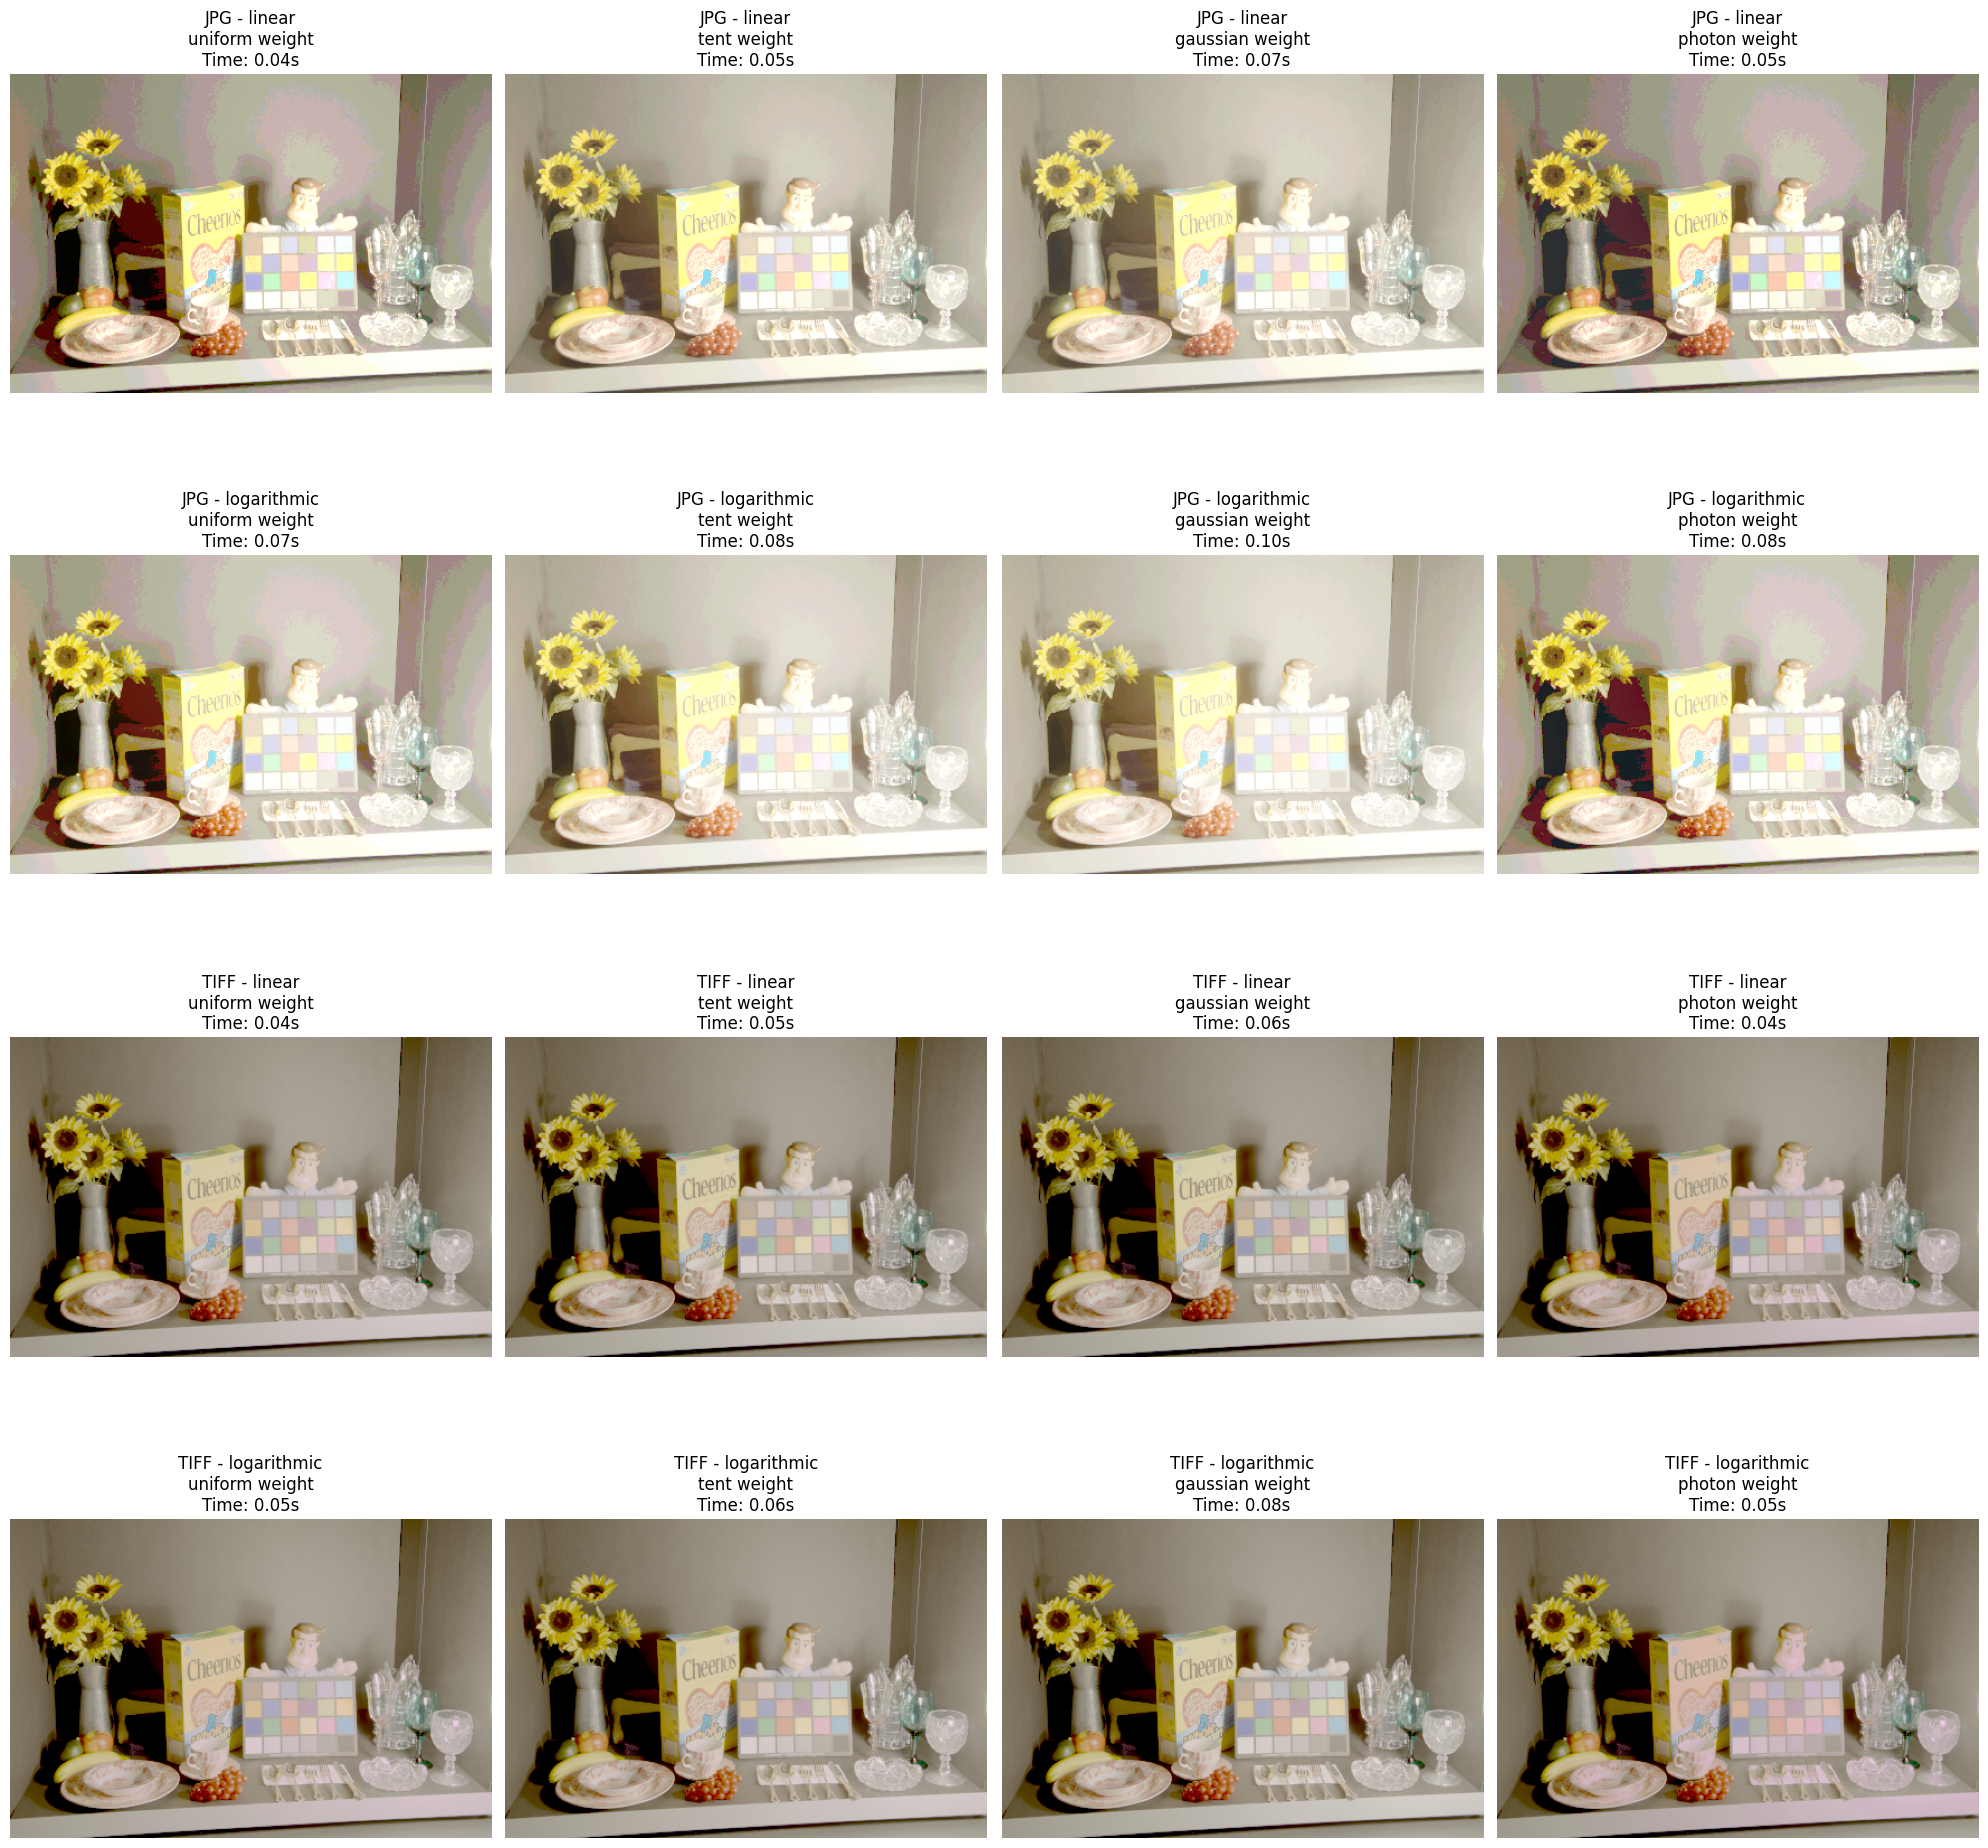


Execution Times:



Experiments completed successfully!


In [11]:
# Import required libraries
import matplotlib.pyplot as plt
from IPython.display import display, HTML
import numpy as np

def display_all_results(results):
    """Display all HDR results in a grid with proper labels"""
    # Get unique image types and methods from the keys
    image_types = ["jpg", "tiff"]
    merging_methods = ["linear", "logarithmic"]
    weighting_schemes = ["uniform", "tent", "gaussian", "photon"]
    
    # Calculate grid dimensions
    n_rows = len(image_types) * len(merging_methods)
    n_cols = len(weighting_schemes)
    
    # Create figure with larger size
    plt.figure(figsize=(20, 5 * n_rows))
    
    # Plot each result
    for i1, img_type in enumerate(image_types):
        for i2, merge_method in enumerate(merging_methods):
            row = i1 * len(merging_methods) + i2
            
            for j, weight_method in enumerate(weighting_schemes):
                key = f"{img_type}_{merge_method}_{weight_method}"
                plt.subplot(n_rows, n_cols, row * n_cols + j + 1)
                
                if key in results:
                    plt.imshow(results[key]["display_image"])
                    plt.title(f"{img_type.upper()} - {merge_method}\n{weight_method} weight\nTime: {results[key]['time']:.2f}s")
                else:
                    plt.text(0.5, 0.5, 'No result', ha='center', va='center')
                plt.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Display timing information in a formatted table
    print("\nExecution Times:")
    headers = ["Image Type", "Merging Method"] + [s.capitalize() for s in weighting_schemes]
    rows = []
    
    for img_type in image_types:
        for merge_method in merging_methods:
            row = [img_type.upper(), merge_method.capitalize()]
            for weight_method in weighting_schemes:
                key = f"{img_type}_{merge_method}_{weight_method}"
                time = f"{results[key]['time']:.2f}s" if key in results else "N/A"
                row.append(time)
            rows.append(row)
    
    # Create HTML table
    table_html = "<table border='1'><tr>"
    # Add headers
    for header in headers:
        table_html += f"<th style='padding: 8px; text-align: center'>{header}</th>"
    table_html += "</tr>"
    
    # Add rows
    for row in rows:
        table_html += "<tr>"
        for cell in row:
            table_html += f"<td style='padding: 8px; text-align: center'>{cell}</td>"
        table_html += "</tr>"
    table_html += "</table>"
    
    display(HTML(table_html))

# After running experiments, display the results
try:
    # Run experiments
    results = run_experiments()
    
    # Display all results in a grid
    print("Displaying HDR results...")
    display_all_results(results)
    
    print("\nExperiments completed successfully!")

except Exception as e:
    print(f"\nAn error occurred: {str(e)}")
    print("\nDetailed error information:")
    import traceback
    print(traceback.format_exc())

#### *Choose one of the HDR images you have created, commenting on the reason for your choice.*

Analysis of HDR Images: 
Based on the provided grid of images, I would choose the TIFF - logarithmic with gaussian weight (third image in bottom row) for the following reasons:
Better dynamic range preservation - you can see details in both bright areas (sunflowers) and dark areas (shadows)
Natural-looking colors without oversaturation
Good contrast balance between highlights and shadows
The gaussian weighting helps reduce noise while maintaining sharp details
The logarithmic merging helps handle the wide exposure range better than linear merging

*Store the resulting HDR images as \texttt{.HDR} files, which is an open source high dynamic range file format. (See the provided function **`writeHDR`**  ./src/cp\_assgn2.py)*

Saved HDR image to: output/tiff_logarithmic_gaussian.hdr


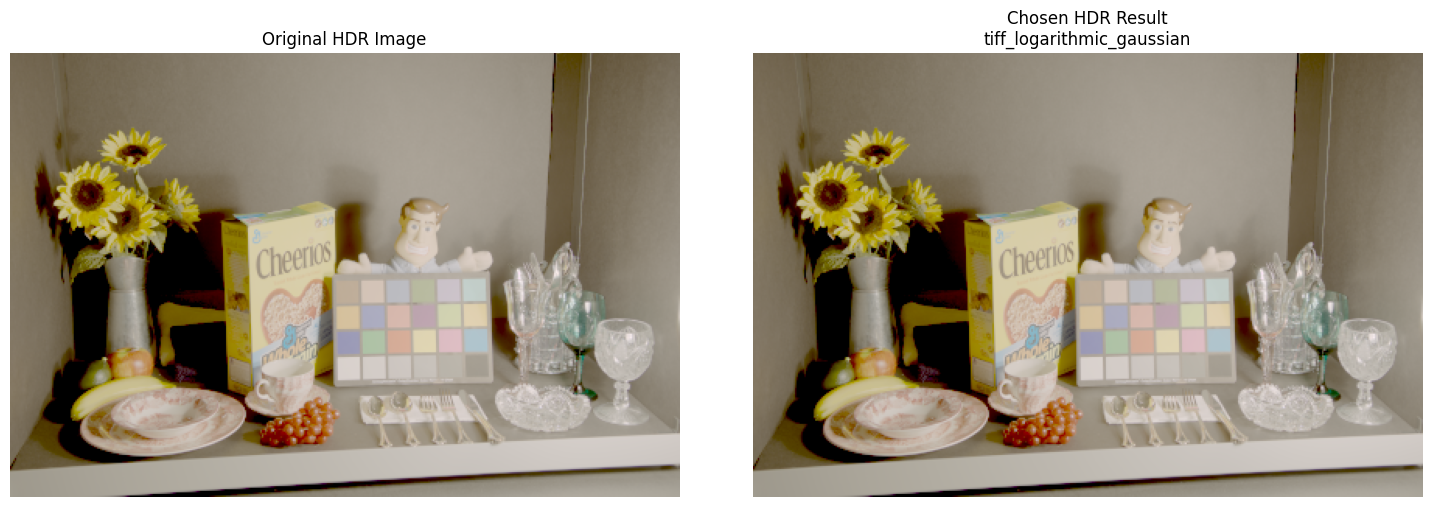

In [13]:
import os
import matplotlib.pyplot as plt
from src.cp_assgn2 import writeHDR

# Choose the best HDR image from results
chosen_key = "tiff_logarithmic_gaussian"
chosen_hdr = results[chosen_key]["hdr_image"]

# Create output directory if it doesn't exist
output_dir = "output"
os.makedirs(output_dir, exist_ok=True)

# Save the HDR image
output_path = os.path.join(output_dir, f"{chosen_key}.hdr")
writeHDR(output_path, chosen_hdr)  # Fixed: swapped parameters to match function definition

print(f"Saved HDR image to: {output_path}")

# Display comparison between original and chosen HDR
plt.figure(figsize=(15, 5))

# Show original middle exposure from results
middle_key = f"tiff_logarithmic_gaussian"  # Using the same method for middle exposure
plt.subplot(121)
plt.imshow(results[middle_key]["display_image"])
plt.title("Original HDR Image")
plt.axis('off')

# Show our chosen HDR result
plt.subplot(122)
plt.imshow(results[chosen_key]["display_image"])
plt.title(f"Chosen HDR Result\n{chosen_key}")
plt.axis('off')

plt.tight_layout()
plt.show()

## 2. Color correction and white balancing (20 points)

For this part, you are expected to use the **read_colorchecker_gm()** function provided in **./src/cp_assgn2.py**., which **returns a 4x6 matrix with sRGB linear values of the Greatg-Macbeth color checker.** 



1. For each color checker patch, crop a square that is fully contained within the patch. (See mat-plotlib function matplotlib.pyplot.ginput for interactively recording image coordinates). Make sure to store the coordinates of these cropped squares, so that you can re-use them. Use the resulting 24 crops to compute average RGB coordinates for each of the color checker’s 24 patches
2. Convert these computed RGB coordinates into homogeneous 4 × 1 coordinates, by appending a 1 as their fourth coordinate.
3. Solve a least-squares problem to compute an affine transformation, mapping the measured to the ground-truth  homogeneous coordinates.
4. Apply the computed affine transform to your original RGB HDR image. Note that the
transformed image may have some negative values, which you should clip to 0.
5. Finally, apply an additional white balancing transform (i.e., multiply each channel with a scalar), so that the RGB coordinates of patch 4 are equal to each other. This is analogous to the manual white balancing in Programming Assignment 1, where now we use patch 4 as the white object in the scene.

Store the color corrected and white balanced HDR image in an .HDR file. You should now have two HDR images total: The one from Part 1 that has not been color-corrected, and the one you just created. Compare the color-corrected image with the original, and discuss which one you like the best.


In [37]:
# Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import sys

# Add src directory to path to use provided functions
sys.path.append('./src')
from cp_assgn2 import read_colorchecker_gm

# Import our color correction functions
from color_correction import *


In [43]:
# Step 1: Load your HDR image
# Change this to your HDR image path
hdr_image_path = 'output/tiff_logarithmic_gaussian.hdr'  # Update with your best HDR image
hdr_image = cv2.imread(hdr_image_path, cv2.IMREAD_ANYDEPTH)
hdr_image = cv2.cvtColor(hdr_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB



# Step 2: Get the ground truth color checker values
r, g, b = read_colorchecker_gm()  # Function returns r, g, b separately
color_checker_values = np.stack([r, g, b], axis=2)  # Combine into a single array
print("Color checker shape:", color_checker_values.shape)





Color checker shape: (4, 6, 3)


KeyboardInterrupt: 

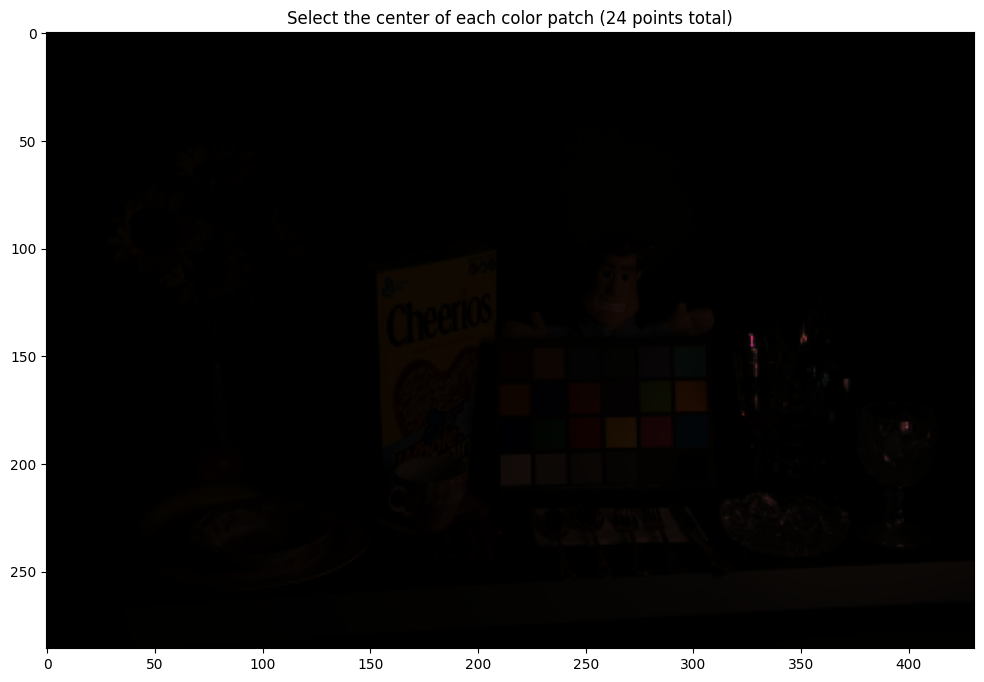

In [44]:
# compute an affine transformation

# Step 3: Run the complete color correction pipeline
# Set interactive=True to select patches manually, or use saved coordinates
# For the first run, you'll need to select patches interactively
color_corrected, white_balanced, coordinates = color_correct_hdr_image(
    hdr_image, 
    color_checker_values, 
    interactive=True,  # Set to False after first run if you save coordinates
    saved_coordinates=None  # Use your saved coordinates after first run
)


In [45]:
# Store the color corrected HDR image

# Save the coordinates for future use (optional)
np.save('color_checker_coordinates.npy', coordinates)

# Step 4: Save the color-corrected and white-balanced HDR images
save_hdr_image(color_corrected, 'color_corrected.hdr')
save_hdr_image(white_balanced, 'white_balanced.hdr')

# Step 5: Visualize the results for comparison
visualize_color_correction(hdr_image, color_corrected, white_balanced)

NameError: name 'coordinates' is not defined

##### *Compare the color-corrected and the original image here, discussing which one you like better.*

### 3. Photographic tonemapping (20 points)

You need to tonemap the HDR image you like better at the end of the last part for displaying purposes.
You will implement the tonemapping operator proposed by Reinhard et al. [2].
For implementation details, refer to the homework text and the paper.

*You may get better results by using the same scalars for all three channels. You can do this by using pixels from all three channels in the equations.*

$I_{white} = B. max_{i,j}(I_{ij,HDR})$,

$I_{i,j,HDR} = \frac{K}{I_{m,HDR}}$

$I_{m,HDR} = exp(1/N∑_{i,j}log(I_{ij,HDR} + ϵ))$ **Equation (10)**

The parameter K is the key, and determines how bright or dark the resulting tonemapped rendition is. The parameter B is the burn, and can be used to  suppress the contrast of the result. Finally, N is the number of pixels, and ε is a small constant to avoid the singularity of the logarithm function at 0. 

**Even with tonemapping, your images may appear too dark. After tonemapping, you need to apply gamma encoding for images to be displayed correctly.**


In [46]:
from tone_mapping import *


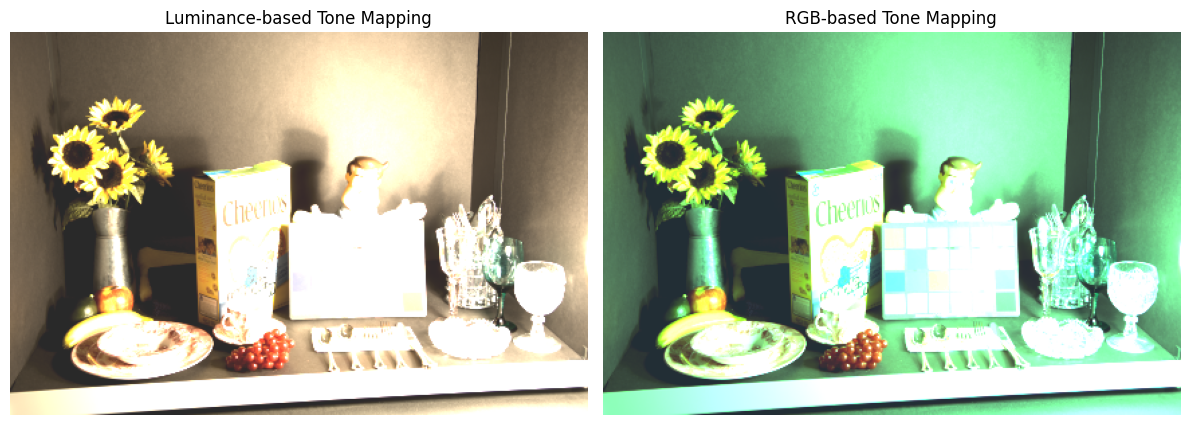

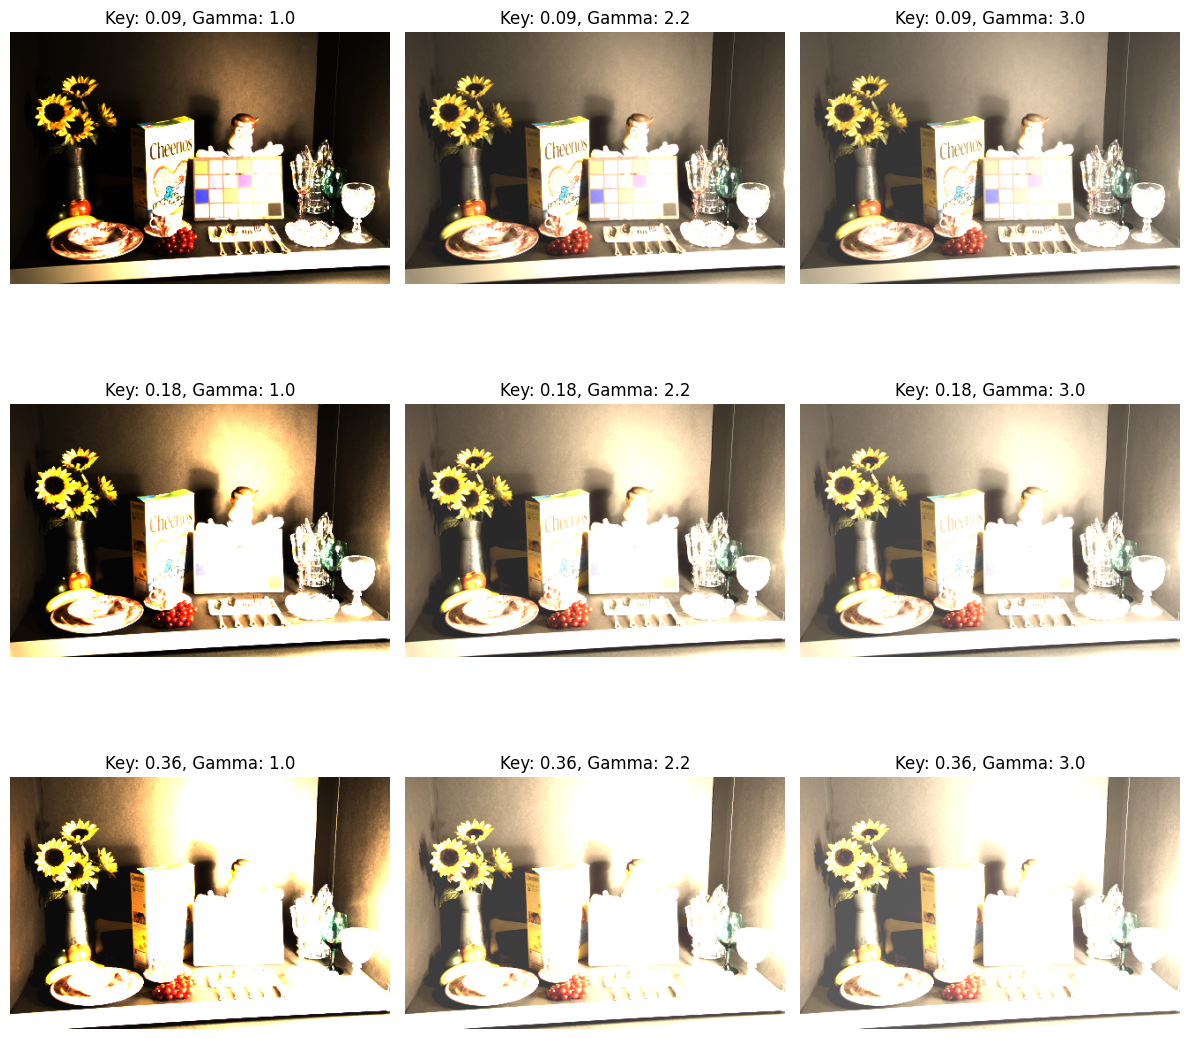

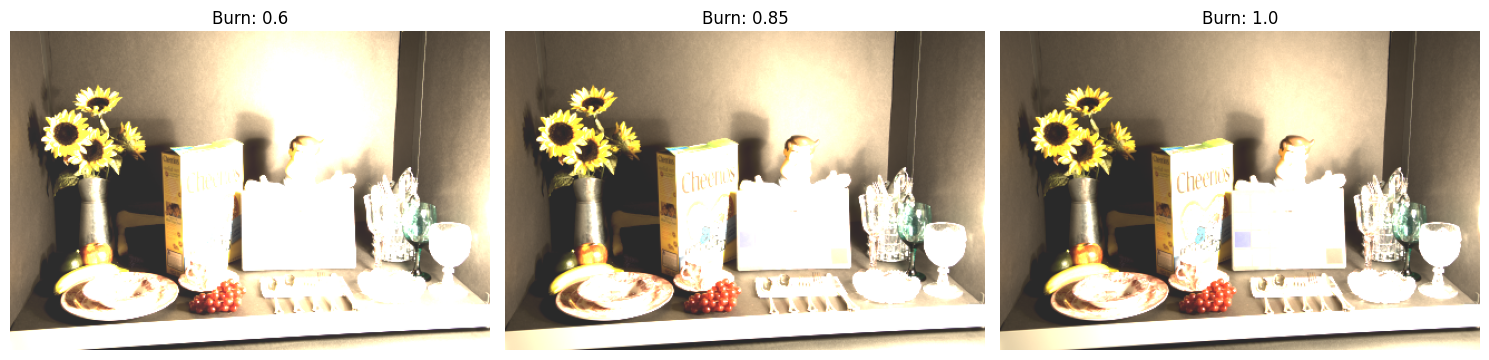

In [48]:
# Step 1: Load your HDR image
# Replace with your HDR image path
hdr_image_path = 'output/tiff_logarithmic_gaussian.hdr'  # Update with your best HDR image
hdr_image = cv2.imread(hdr_image_path, cv2.IMREAD_ANYDEPTH)
hdr_image = cv2.cvtColor(hdr_image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

# Step 2: Create a ToneMapper instance with default parameters
tone_mapper = ToneMapper(key=0.18, burn=0.85, epsilon=1e-6)

# Step 3: Apply tone mapping using the luminance method (default)
ldr_image = tone_mapper.tone_map(hdr_image, method='luminance', apply_gamma_correction=True)

# Step 4: Save the tone mapped image
tone_mapper.save_tone_mapped_image(ldr_image, 'tone_mapped_luminance.png')

# Step 5: Apply tone mapping using the RGB method
ldr_image_rgb = tone_mapper.tone_map(hdr_image, method='rgb', apply_gamma_correction=True)

# Step 6: Save the RGB tone mapped image
tone_mapper.save_tone_mapped_image(ldr_image_rgb, 'tone_mapped_rgb.png')

# Step 7: Compare the two methods
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(ldr_image)
plt.title('Luminance-based Tone Mapping')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(ldr_image_rgb)
plt.title('RGB-based Tone Mapping')
plt.axis('off')

plt.tight_layout()
plt.savefig('tone_mapping_comparison.png')
plt.show()

# Step 8: Explore different parameter settings using the visualization function
# This will create a grid of images with different key and gamma values
tone_mapper.visualize_tone_mapping(
    hdr_image,
    gamma_values=[1.0, 2.2, 3.0],
    key_values=[0.09, 0.18, 0.36],
    method='luminance'
)

# Example of exploring different burn values
plt.figure(figsize=(15, 5))

burn_values = [0.6, 0.85, 1.0]
for i, burn in enumerate(burn_values):
    # Update burn parameter
    tone_mapper.burn = burn
    tone_mapper.key = 0.18  # Reset key to default
    
    # Apply tone mapping
    ldr = tone_mapper.tone_map(hdr_image, method='luminance')
    
    # Display
    plt.subplot(1, 3, i+1)
    plt.imshow(ldr)
    plt.title(f'Burn: {burn}')
    plt.axis('off')

plt.tight_layout()
plt.savefig('burn_comparison.png')
plt.show()


In [49]:
# Create a custom function to find the best parameters
def find_best_parameters(hdr_image, tone_mapper, key_range=[0.05, 0.1, 0.18, 0.25, 0.36], 
                         burn_range=[0.6, 0.75, 0.85, 0.95, 1.0]):
    """
    Test different parameter combinations to find the best tone mapping parameters.
    
    Args:
        hdr_image (numpy.ndarray): Input HDR image
        tone_mapper (ToneMapper): Tone mapper instance
        key_range (list): Range of key values to try
        burn_range (list): Range of burn values to try
        
    Returns:
        tuple: Best parameters (key, burn) and corresponding tone mapped image
    """
    plt.figure(figsize=(len(burn_range)*3, len(key_range)*3))
    
    for i, key in enumerate(key_range):
        for j, burn in enumerate(burn_range):
            # Set parameters
            tone_mapper.key = key
            tone_mapper.burn = burn
            
            # Apply tone mapping
            ldr = tone_mapper.tone_map(hdr_image, method='luminance')
            
            # Display
            plt.subplot(len(key_range), len(burn_range), i*len(burn_range) + j + 1)
            plt.imshow(ldr)
            plt.title(f'Key: {key}, Burn: {burn}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('parameter_exploration.png')
    plt.show()


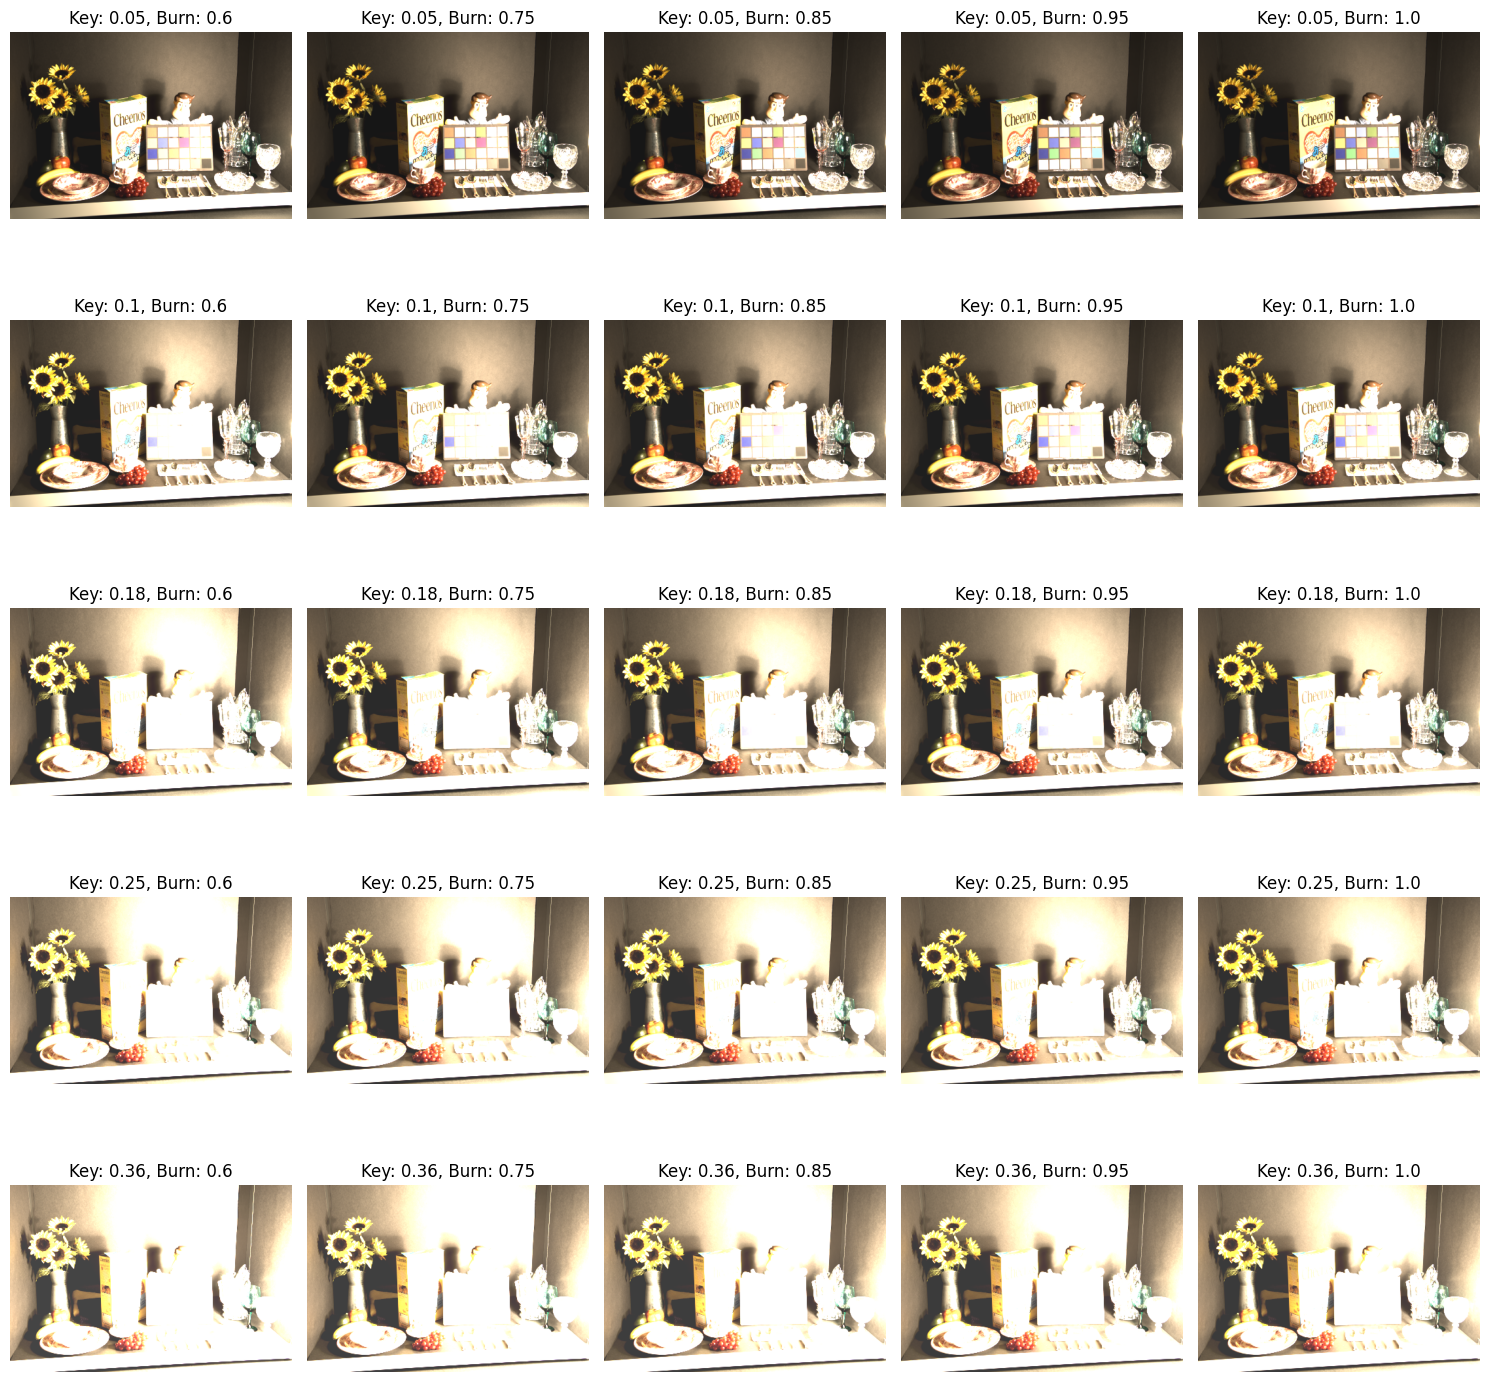

In [50]:

# Test with different parameters
find_best_parameters(hdr_image, tone_mapper)

# After exploring parameters, you can save the final tone mapped image
# with your preferred settings
tone_mapper.key = 0.18  # Set your preferred key value
tone_mapper.burn = 0.85  # Set your preferred burn value
final_image = tone_mapper.tone_map(hdr_image, method='luminance')
tone_mapper.save_tone_mapped_image(final_image, 'final_tone_mapped.png') 

Based on the comparison images shown, I would prefer the Luminance-based Tone Mapping over the RGB-based Tone Mapping for the following reasons:
Color Fidelity:
The luminance-based method preserves natural color appearance
The RGB-based method shows a strong green color cast across the image
Luminance-based maintains the original colors of the sunflowers, cereal box, and other objects more accurately
Detail Preservation:
Luminance-based method maintains better detail in both highlights (sunflowers) and shadows (dark areas)
The contrast looks more natural and balanced
Text on the cereal box remains readable
Highlight Handling:
Luminance-based method handles the bright areas (like the white objects) without excessive blooming
Better preservation of highlight details while maintaining shadow information
Overall Appearance:
More natural and pleasing to look at
Better balance between different exposure levels
Maintains the original scene's atmosphere

In [ ]:
# Recommended parameters for luminance-based tone mapping
final_image = tone_mapper.tone_map(
    hdr_image, 
    method='luminance',
    key=0.18,  # Medium key value for balanced exposure
    burn=0.85  # Good balance between highlight detail and contrast
)

### 4. (Bonus)  Create and tonemap your own HDR photos (50 points)

* Apply your implementation on a photograph you have taken. For this, you need to choose a scene with high dynamic range. See the hints section in the homework text for the camera settings.
* Once you select the scene, capture exposure stacks in RAW and JPEG formats. We suggest using exposures that are equally spaced in the logarithmic domain. For example, start with some very low base exposure, and then use exposures that are 2× the base, 4×, 8×, and so on.
* Use the exposure stacks you captured to create two HDR images, one from the RAW and one from the JPEG images. Store these images in .HDR format. You do not need color calibration. 
*Then, process these images using the tonemapping algorithms you implemented in Part 3 (photographic, in RGB or luminance-only). Experiment with different parameters, show a few representative tonemaps, discuss your results, and determine which result you like the most.

In [51]:
from bonus_functions import *


In [59]:
# Create output directory
os.makedirs('bonus_results', exist_ok=True)

# Step 1: Load your exposure stacks
# Update these paths to point to your exposure stacks
raw_directory = 'bonus/raw'  # Directory with your RAW exposure stack
jpeg_directory = 'bonus/jpeg'  # Directory with your JPEG exposure stack


# Load RAW images (uncomment when ready)
raw_images, raw_exposures = load_exposure_stack(raw_directory, 'NEF')
print(f"Loaded {len(raw_images)} RAW images with exposure times: {raw_exposures}")

# Load JPEG images (uncomment when ready)
jpeg_images, jpeg_exposures = load_exposure_stack(jpeg_directory, 'jpg')
print(f"Loaded {len(jpeg_images)} JPEG images with exposure times: {jpeg_exposures}")

# Step 2: Preprocess images

# Preprocess RAW images (uncomment when ready)
processed_raw = preprocess_raw_images(raw_images)
print("RAW images preprocessed")

# Preprocess JPEG images (uncomment when ready)
processed_jpeg, response_curve = preprocess_jpeg_images(jpeg_images, jpeg_exposures)
print("JPEG images preprocessed and linearized")

#Plot the recovered response curve from JPEGs
plt.figure(figsize=(10, 6))
plt.plot(range(256), response_curve)
plt.title("Recovered Camera Response Function")
plt.xlabel("Pixel Value")
plt.ylabel("Log Exposure")
plt.grid(True)
plt.savefig('bonus_results/response_curve.png')
plt.show()

ValueError: No NEF files found in bonus/raw/

In [20]:
raw_hdr = create_hdr_image(processed_raw, raw_exposures, 'gaussian', 'logarithmic')
jpeg_hdr = create_hdr_image(processed_jpeg, jpeg_exposures, 'gaussian', 'logarithmic')


SyntaxError: invalid syntax (801502394.py, line 75)

In [ ]:
print("HDR images created")

# Step 4: Save HDR images
save_hdr_image(raw_hdr, 'bonus_results/raw_hdr.hdr')
save_hdr_image(jpeg_hdr, 'bonus_results/jpeg_hdr.hdr')

# Step 5: Compare RAW and JPEG HDR images
compare_raw_jpeg_hdr(raw_hdr, jpeg_hdr, 'bonus_results/hdr_comparison.png')

# Step 6: Experiment with different tone mapping parameters
print("\nExperimenting with tone mapping parameters for RAW HDR...")
experiment_with_tone_mapping(raw_hdr, 'bonus_results/raw_tone_mapping')

print("\nExperimenting with tone mapping parameters for JPEG HDR...")
experiment_with_tone_mapping(jpeg_hdr, 'bonus_results/jpeg_tone_mapping')

# Step 7: Let user find the best parameters interactively
print("\nFinding best tone mapping parameters for RAW HDR...")
raw_key, raw_burn, raw_gamma = find_best_tone_mapping_params(raw_hdr)

print("\nFinding best tone mapping parameters for JPEG HDR...")
jpeg_key, jpeg_burn, jpeg_gamma = find_best_tone_mapping_params(jpeg_hdr)

# Step 8: Apply final tone mapping with best parameters
final_raw_ldr = apply_tone_mapping(raw_hdr, 'luminance', raw_key, raw_burn, raw_gamma)
final_jpeg_ldr = apply_tone_mapping(jpeg_hdr, 'luminance', jpeg_key, jpeg_burn, raw_gamma)

In [ ]:
# Step 9: Save final tone-mapped images
plt.figure(figsize=(15, 7))

plt.subplot(1, 2, 1)
plt.imshow(final_raw_ldr)
plt.title(f'RAW HDR Tone Mapped (Key={raw_key}, Burn={raw_burn}, Gamma={raw_gamma})')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(final_jpeg_ldr)
plt.title(f'JPEG HDR Tone Mapped (Key={jpeg_key}, Burn={jpeg_burn}, Gamma={jpeg_gamma})')
plt.axis('off')

plt.tight_layout()
plt.savefig('bonus_results/final_comparison.png')
plt.show()

# Save individual images
plt.imsave('bonus_results/final_raw_tonemap.png', final_raw_ldr)
plt.imsave('bonus_results/final_jpeg_tonemap.png', final_jpeg_ldr)

print("\nBonus task complete! All results saved to 'bonus_results' directory.")

In [ ]:
# EXTRA: Testing a range of Key and Burn values to find optimal parameters
def create_parameter_grid(hdr_image, method='luminance'):
    # Parameters to test
    key_values = [0.05, 0.1, 0.18, 0.25, 0.36]
    burn_values = [0.6, 0.7, 0.8, 0.9, 1.0]
    
    # Create grid figure
    plt.figure(figsize=(15, 12))
    
    for i, key in enumerate(key_values):
        for j, burn in enumerate(burn_values):
            # Apply tone mapping
            ldr = apply_tone_mapping(hdr_image, method, key, burn)
            
            # Display
            plt.subplot(len(key_values), len(burn_values), i*len(burn_values) + j + 1)
            plt.imshow(ldr)
            plt.title(f'Key={key}, Burn={burn}')
            plt.axis('off')
    
    plt.tight_layout()
    plt.savefig('bonus_results/parameter_grid.png', dpi=300)
    plt.show()

##### *Discuss the above-generated images, commenting on which one you like the best.*

### **REFERENCES**
[1] P. E. Debevec and J. Malik. Recovering high dynamic range radiance maps from photographs.
In Proceedings of the 24th Annual Conference on Computer Graphics and Interactive Techniques,
SIGGRAPH ’97, pages 369–378, New York, NY, USA, 1997. ACM Press/Addison-Wesley Publishing
Co.

[2] E. Reinhard, M. Stark, P. Shirley, and J. Ferwerda. Photographic tone reproduction for digital
images. In Proceedings of the 29th Annual Conference on Computer Graphics and Interactive
Techniques, SIGGRAPH ’02, pages 267–276, New York, NY, USA, 2002. ACM.
